In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from geopy.distance import great_circle
import zipfile
import os

**Importing the Data Source**

In [2]:
import zipfile
import os

# Specify the path to your zip file
zip_file_path = r'C:\Users\DELL\Downloads\Cyclistic'  # Update this path

# Check if the zip file exists
if not os.path.exists(zip_file_path):
    print(f"File not found: {zip_file_path}")
else:
    # Create a directory to extract the files
    extraction_path = 'extracted_data'
    os.makedirs(extraction_path, exist_ok=True)

    # Extract the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)

    print("Files extracted to:", extraction_path)


File not found: C:\Users\DELL\Downloads\Cyclistic


In [5]:
# 1- Prepare Libraries and Data Frame
# Specify the path to your zip file
zip_file_path = 'Cyclistic.zip'  # Update this path if needed
data_frames = []

# Load the data directly from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Loop through each file in the zip
    for file in zip_ref.namelist():
        if file.endswith('.csv'):
            with zip_ref.open(file) as f:
                df = pd.read_csv(f)
                data_frames.append(df)

# Combine all data into one DataFrame
all_data = pd.concat(data_frames, ignore_index=True)

# Check the column names
print(all_data.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [6]:
#    1.B- Cast and Clean Data Frame
# Convert the "started_at" and "ended_at" columns from string to datetime
all_data['started_at'] = pd.to_datetime(all_data['started_at'])
all_data['ended_at'] = pd.to_datetime(all_data['ended_at'])
# Drop rows with missing values
all_data.dropna(inplace=True)

In [7]:
#   2- Analyze Annual and Casual Members Separately
#   2.A - Annual Members
# Create a DataFrame for annual riders
annual_members = all_data[all_data['member_casual'] == 'member']

# Calculate the total number of trips
total_trips_annual = len(annual_members)

# Calculate the average trip duration
average_duration_annual = (annual_members['ended_at'] - annual_members['started_at']).dt.total_seconds().mean() / 60

# Calculate distance
valid_annual_members = annual_members.dropna(subset=['start_lng', 'start_lat', 'end_lng', 'end_lat'])
trip_distances_annual = valid_annual_members.apply(
    lambda row: great_circle((row['start_lat'], row['start_lng']), (row['end_lat'], row['end_lng'])).kilometers, axis=1
)
average_distance_annual = trip_distances_annual.mean()
# Print the results
print("Results for Annual Members")
print(f"Total trips: {total_trips_annual}")
print(f"The average trip duration is {average_duration_annual:.1f} minutes.")
print(f"The average trip distance is {average_distance_annual:.1f} kilometers.")


Results for Annual Members
Total trips: 2648066
The average trip duration is 12.7 minutes.
The average trip distance is 2.0 kilometers.


In [8]:
#   2.B - Casual Members
# Create a DataFrame for casual riders
casual_members = all_data[all_data['member_casual'] == 'casual']

# Calculate the total number of trips
total_trips_casual = len(casual_members)

# Calculate the average trip duration
average_duration_casual = (casual_members['ended_at'] - casual_members['started_at']).dt.total_seconds().mean() / 60

# Calculate distance
valid_casual_members = casual_members.dropna(subset=['start_lng', 'start_lat', 'end_lng', 'end_lat'])
trip_distances_casual = valid_casual_members.apply(
    lambda row: great_circle((row['start_lat'], row['start_lng']), (row['end_lat'], row['end_lng'])).kilometers, axis=1
)
average_distance_casual = trip_distances_casual.mean()

# Print the results
print("Results for Casual Members")
print(f"Total trips: {total_trips_casual}")
print(f"The average trip duration is {average_duration_casual:.1f} minutes.")
print(f"The average trip distance is {average_distance_casual:.1f} kilometers.")


Results for Casual Members
Total trips: 2019233
The average trip duration is 30.1 minutes.
The average trip distance is 2.2 kilometers.


In [ ]:
#   3- Analyze Both Types of Members Together
#   3.A - Member Behavior vs Day of Week
all_data['day_of_week'] = all_data['started_at'].dt.day_name()
day_of_week_rides = all_data.groupby(['day_of_week', 'member_casual']).size().reset_index(name='count')


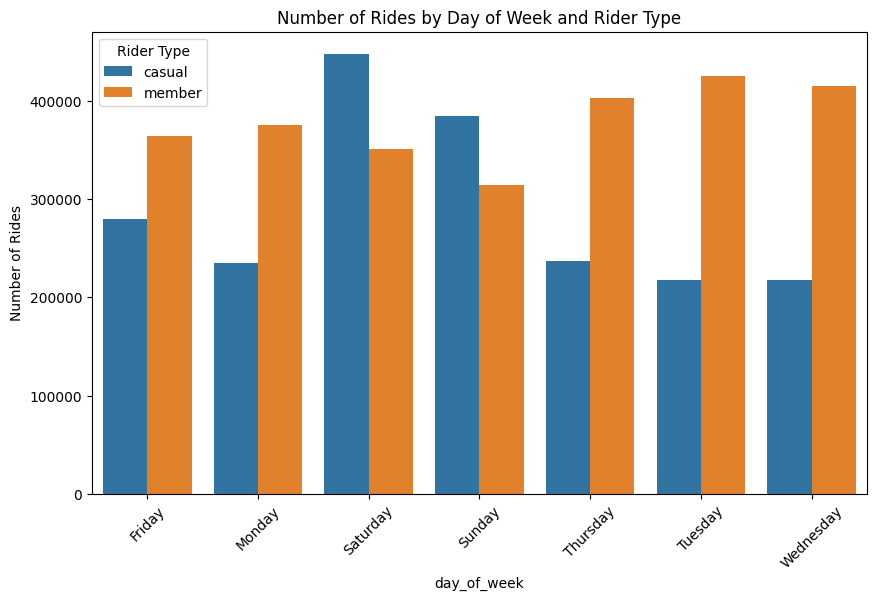

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=day_of_week_rides, x='day_of_week', y='count', hue='member_casual')
plt.title('Number of Rides by Day of Week and Rider Type')
plt.xticks(rotation=45)
plt.ylabel('Number of Rides')
plt.legend(title='Rider Type')
plt.show()

In [ ]:
#--------------------------------------------
#   3.B - Member Behavior vs Month of the Year
#--------------------------------------------
all_data['month'] = all_data['started_at'].dt.month_name()
month_rides = all_data.groupby(['month', 'member_casual']).size().reset_index(name='count')

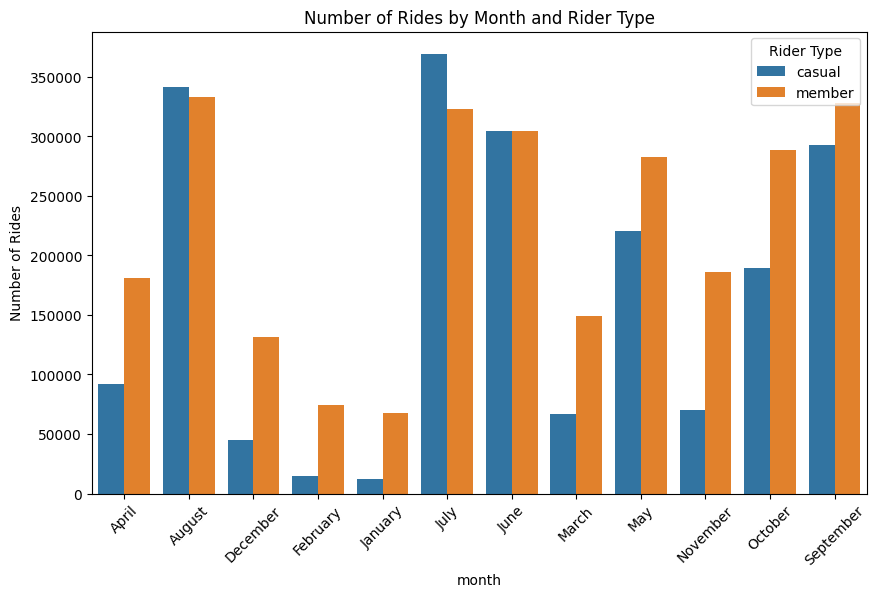

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=month_rides, x='month', y='count', hue='member_casual')
plt.title('Number of Rides by Month and Rider Type')
plt.xticks(rotation=45)
plt.ylabel('Number of Rides')
plt.legend(title='Rider Type')
plt.show()


In [ ]:
#--------------------------------------------
#   3.C - Member Behavior vs Time Intervals of the Day
#--------------------------------------------
all_data['time_interval'] = pd.cut(all_data['started_at'].dt.hour, bins=np.arange(0, 24, 3), right=False)
ride_counts = all_data.groupby(['time_interval', 'member_casual']).size().reset_index(name='count')


<ipython-input-19-ddab8fe1f9b4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ride_counts = all_data.groupby(['time_interval', 'member_casual']).size().reset_index(name='count')


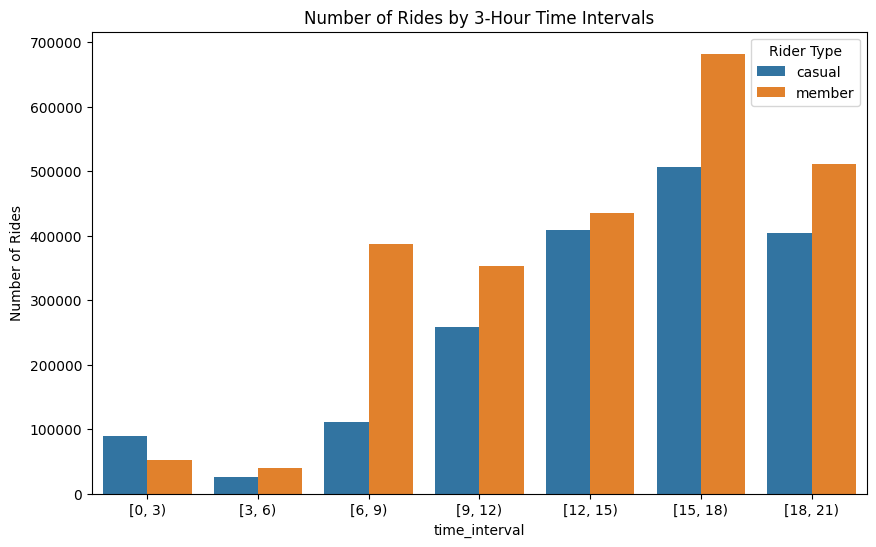

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ride_counts, x='time_interval', y='count', hue='member_casual')
plt.title('Number of Rides by 3-Hour Time Intervals')
plt.ylabel('Number of Rides')
plt.legend(title='Rider Type')
plt.show()

In [ ]:
#--------------------------------------------
#   3.D - Rides Taken by Each Member (Normalized) by Rideable Type
#--------------------------------------------
ride_counts = all_data[all_data['rideable_type'] != 'docked_bike'].groupby(['member_casual', 'rideable_type']).size().reset_index(name='count')
total_rides = all_data[all_data['rideable_type'] != 'docked_bike'].groupby('member_casual').size().reset_index(name='total')
ride_counts = pd.merge(ride_counts, total_rides, on='member_casual')
ride_counts['normalized'] = ride_counts['count'] / ride_counts['total']


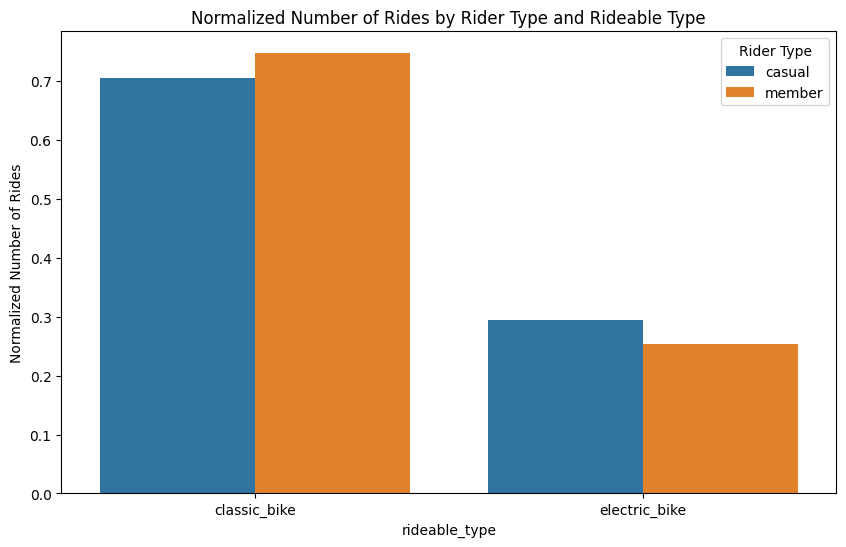

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ride_counts, x='rideable_type', y='normalized', hue='member_casual')
plt.title('Normalized Number of Rides by Rider Type and Rideable Type')
plt.ylabel('Normalized Number of Rides')
plt.legend(title='Rider Type')
plt.show()

In [ ]:
#1. How do annual members and casual riders use Cyclistic bikes differently?
#-------------------------------

# Create DataFrames for annual and casual riders
annual_members = all_data[all_data['member_casual'] == 'member']
casual_members = all_data[all_data['member_casual'] == 'casual']

# Analyze trip durations
annual_members['ride_length'] = (annual_members['ended_at'] - annual_members['started_at']).dt.total_seconds() / 60
casual_members['ride_length'] = (casual_members['ended_at'] - casual_members['started_at']).dt.total_seconds() / 60

# Calculate average ride length
average_duration_annual = annual_members['ride_length'].mean()
average_duration_casual = casual_members['ride_length'].mean()

# Calculate total number of trips
total_trips_annual = len(annual_members)
total_trips_casual = len(casual_members)

# Print results
print("Annual Members:")
print(f"Total Trips: {total_trips_annual}, Average Ride Duration: {average_duration_annual:.2f} minutes")

print("\nCasual Members:")
print(f"Total Trips: {total_trips_casual}, Average Ride Duration: {average_duration_casual:.2f} minutes")


Annual Members:
Total Trips: 2648066, Average Ride Duration: 12.68 minutes

Casual Members:
Total Trips: 2019233, Average Ride Duration: 30.10 minutes


<ipython-input-24-5e10140cdf86>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_members['ride_length'] = (annual_members['ended_at'] - annual_members['started_at']).dt.total_seconds() / 60
<ipython-input-24-5e10140cdf86>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual_members['ride_length'] = (casual_members['ended_at'] - casual_members['started_at']).dt.total_seconds() / 60


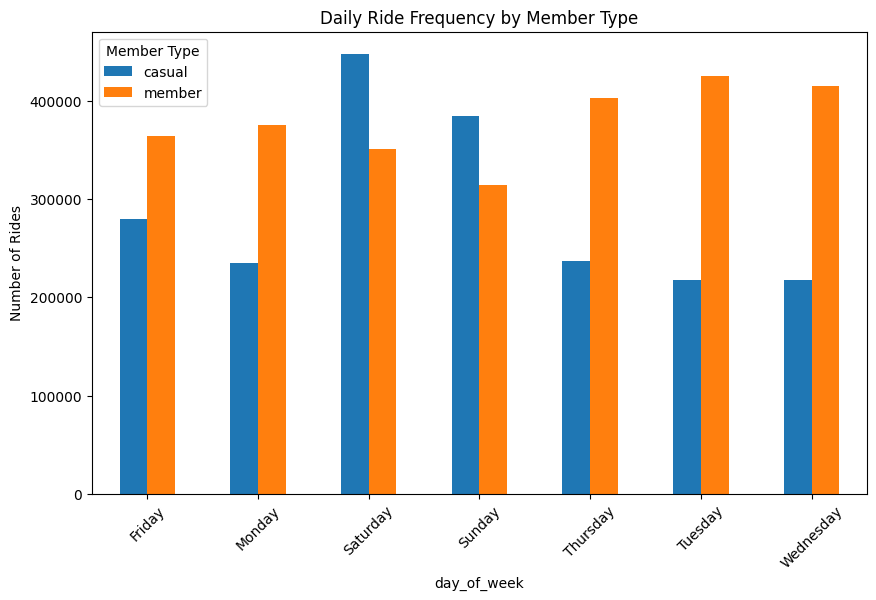

In [ ]:
# 2. Why would casual riders buy Cyclistic annual memberships?
#-------------------------------
# This analysis could involve understanding usage patterns, so we can examine
# frequency and duration. Further qualitative analysis (e.g., surveys) is needed
# to directly address motivations.

# Possible trends that might suggest why they would buy:
# Calculate ride frequency by day of the week
all_data['day_of_week'] = all_data['started_at'].dt.day_name()
daily_usage = all_data.groupby(['day_of_week', 'member_casual']).size().unstack()

# Plot daily usage
daily_usage.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Ride Frequency by Member Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Member Type')
plt.show()

#-------------------------------

<ipython-input-26-b41fde56f8a9>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_interval_usage = all_data.groupby(['time_interval', 'member_casual']).size().unstack()


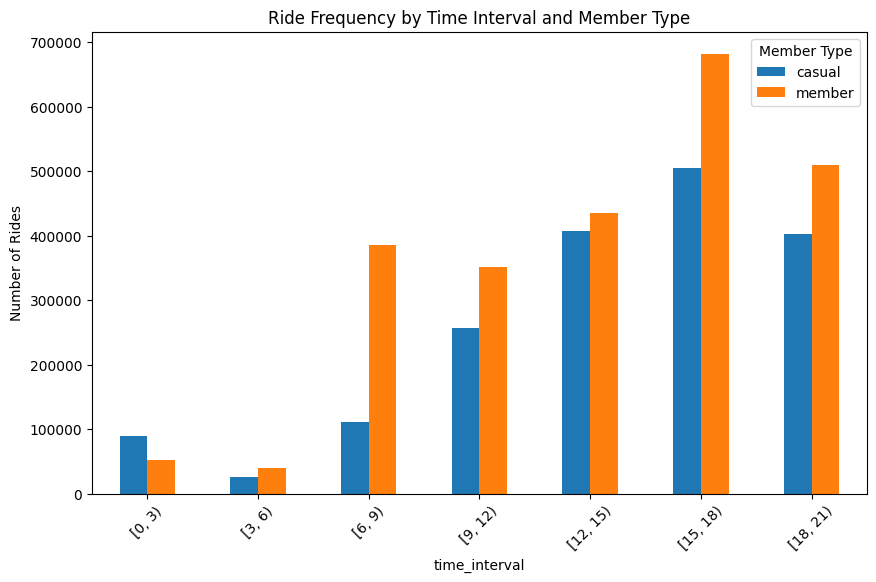

In [ ]:
# 3. How can Cyclistic use digital media to influence casual riders to become members?
#-------------------------------
# For this question, a deeper analysis of marketing channels would be needed.
# Below is an example of visualizing the usage by time of day.

# Create time interval column
all_data['time_interval'] = pd.cut(all_data['started_at'].dt.hour, bins=np.arange(0, 24, 3), right=False)

# Count rides by time interval and member type
time_interval_usage = all_data.groupby(['time_interval', 'member_casual']).size().unstack()

# Plot time interval usage
time_interval_usage.plot(kind='bar', figsize=(10, 6))
plt.title('Ride Frequency by Time Interval and Member Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Member Type')
plt.show()

#--------------------------------
# Summary and Recommendations
#--------------------------------
# Use the insights from the visualizations to formulate recommendations for marketing strategies
# For example:
# 1. Target casual riders during peak times identified in the time interval analysis.
# 2. Promote the convenience and benefits of annual memberships to casual riders after observing their usage patterns.
# 3. Utilize social media campaigns to engage casual riders and inform them of membership benefits.